In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv (r'C:\Users\lucne\Downloads\SPY.csv')
print (df)

            Date        Open        High         Low       Close   Adj Close  \
0     2012-02-15  135.630005  135.830002  134.289993  134.559998  111.106293   
1     2012-02-16  134.570007  136.169998  134.330002  136.050003  112.336617   
2     2012-02-17  136.520004  136.630005  135.960007  136.410004  112.633858   
3     2012-02-21  136.729996  137.050003  136.050003  136.470001  112.683372   
4     2012-02-22  136.259995  136.550003  135.789993  136.029999  112.320076   
...          ...         ...         ...         ...         ...         ...   
2512  2022-02-08  446.730011  451.920013  445.220001  450.940002  450.940002   
2513  2022-02-09  455.220001  457.880005  455.010010  457.540009  457.540009   
2514  2022-02-10  451.339996  457.709991  447.200012  449.320007  449.320007   
2515  2022-02-11  449.410004  451.609985  438.940002  440.459991  440.459991   
2516  2022-02-14  439.920013  441.600006  435.339996  439.019989  439.019989   

         Volume  
0     195195100  
1  

In [28]:
def strategy(df, window = 1):
    df = df.copy()
    df['ret'] = np.log(df.Close.pct_change() + 1)
    df['prior_n'] = df.ret.rolling(window).sum()
    df.dropna(inplace=True)
    df['position'] = [1 if i > 0 else -1 for i in df.prior_n]
    df['strat'] = df.position.shift(1) * df.ret
    return np.exp(df[['ret','strat']].cumsum()).plot(figsize=(12,6))

<AxesSubplot:>

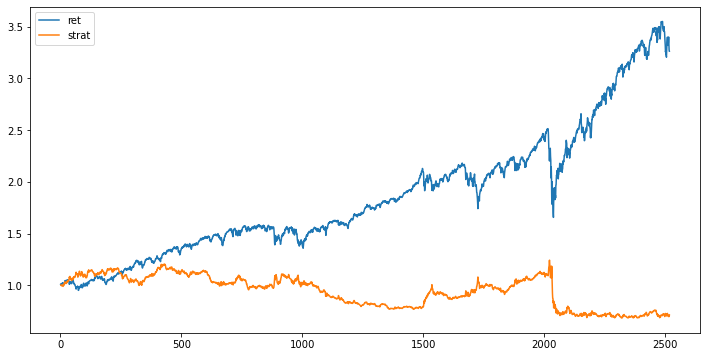

In [29]:
strategy(df,)

In [ ]:
#INTRADAY
